In [1]:
import numpy as np
from scipy.integrate import solve_ivp
import tqdm
import matplotlib.pyplot as plt

In [4]:
stepSize = 0.00001
Us_ = np.arange(0.06, 0.07, stepSize)

t_span = [0, 1000]
initial_condition_offset = np.array([0.00001, 0.00001])
tolerance = 0.00001

distanceTracker = np.zeros(len(Us_))

def system(t, z, u):
    x, y = z
    dxdt = u * x + y - x**2
    dydt = -x + u * y + 2 * x**2
    return [dxdt, dydt]

prev_solution = None

for u in tqdm.tqdm(Us_):

    fix_point = [(1 + u**2)/(u + 2), (1-2*u+u**2-2*u**3)/((2+u)**2)]

    if prev_solution is not None:
        initG = prev_solution.y[:, -1]
    else:
        initG = fix_point - initial_condition_offset

    solution = solve_ivp(system, t_span, initG, args=(u,), dense_output=True)

    prev_solution = solution

    start_position = solution.sol(0)
    end_position = solution.sol(100)
    distance = np.linalg.norm(end_position - start_position)

    distanceTracker[Us_ == u] = distance

    if distance < tolerance:
        print(f"Euclidean Distance is smaller than {tolerance} for u = {u}")
        break

plt.plot(Us_, distanceTracker)

 61%|██████    | 611/1001 [00:22<00:14, 27.32it/s]


KeyboardInterrupt: 

0.06611000000000186


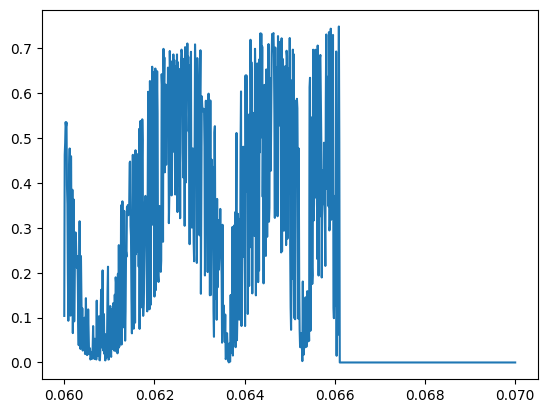

In [5]:
plt.plot(Us_, distanceTracker)
print(u)